<a href="https://colab.research.google.com/github/ciccmeek/Michael-Ciccarelli-FNCE-Python/blob/main/financialdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pandas-datareader

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
import datetime

from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [ ]:
import yfinance as yf

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= end_date)
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.721004,72.776583,71.466797,72.716057,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.941336,72.771752,71.783969,72.009125,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.127858,72.621639,70.876068,72.582901,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.592594,72.849224,72.021231,72.241547,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.943744,73.706264,71.943744,73.403633,132079200,0.0,0.0


## Get the Balance Sheet and Income Statements

In [ ]:
balance_sheet = apple.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = apple.financials
print("\nIncome Statement:")
print(income_statement.head())

# Information about Apple:
info = apple.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = apple.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                            2024-09-30      2023-09-30      2022-09-30  \
Treasury Shares Number             NaN             0.0             NaN   
Ordinary Shares Number   15116786000.0   15550061000.0   15943425000.0   
Share Issued             15116786000.0   15550061000.0   15943425000.0   
Net Debt                 76686000000.0   81123000000.0   96423000000.0   
Total Debt              106629000000.0  111088000000.0  132480000000.0   

                            2021-09-30 2020-09-30  
Treasury Shares Number             NaN        NaN  
Ordinary Shares Number   16426786000.0        NaN  
Share Issued             16426786000.0        NaN  
Net Debt                 89779000000.0        NaN  
Total Debt              136522000000.0        NaN  

Income Statement:
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   

In [ ]:
apple = yf.Ticker("AAPL")

tickers = ["SPY", "AAL", "ZM", "NFLX", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [ ]:
print(META.Close.mean())
META.describe()

300.2422947667379


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,300.078644,304.300185,296.060906,300.242295,2.315541e+07,0.001591,0.0
std,124.856234,125.814469,123.529762,124.713439,1.572882e+07,0.028172,0.0
min,89.737201,90.115752,87.754774,88.571655,4.726100e+06,0.000000,0.0
25%,208.045287,210.794775,205.724145,208.981705,1.453120e+07,0.000000,0.0
50%,278.097672,284.144576,275.228648,279.761322,1.938320e+07,0.000000,0.0
75%,345.310940,350.760165,341.874050,344.972229,2.711680e+07,0.000000,0.0
max,630.991005,637.885465,626.704485,632.170044,2.323166e+08,0.500000,0.0


## Now, let us keep only the closing prices for our analysis.

In [ ]:
## keep only column close for all tickers
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,301.194916
2020-01-03 00:00:00-05:00,298.914185
2020-01-06 00:00:00-05:00,300.054596
2020-01-07 00:00:00-05:00,299.210846
2020-01-08 00:00:00-05:00,300.805542
...,...
2024-12-23 00:00:00-05:00,594.690002
2024-12-24 00:00:00-05:00,601.299988
2024-12-26 00:00:00-05:00,601.340027


In [ ]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'NFLX':NFLX, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2024-12-23 00:00:00-05:00,594.690002,254.989655,17.250000,911.450012,599.849976,85.269997
2024-12-24 00:00:00-05:00,601.299988,257.916443,17.350000,932.119995,607.750000,85.669998
2024-12-26 00:00:00-05:00,601.340027,258.735504,17.350000,924.140015,603.349976,85.440002
2024-12-27 00:00:00-05:00,595.010010,255.309296,17.350000,907.549988,599.809998,83.820000
2024-12-30 00:00:00-05:00,588.219971,251.923019,17.620001,900.429993,591.239990,82.730003


In [ ]:
# print(AAPL)
# print(AAPL.shift(1))

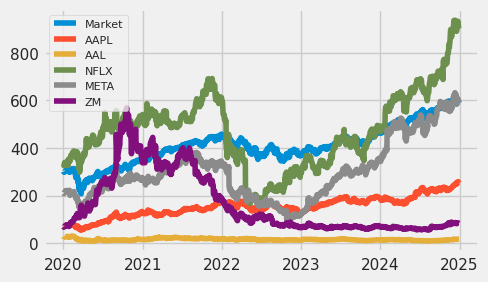

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

## For financial analysis, we require the log returns (daily), rather than the raw stock prices. The formula for log returns is:

log(Today's Price/yesterday's price - 1)

In [ ]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009770,-0.050769,-0.011926,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.030014,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.015242,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005316,0.015958,0.022522,0.025404,0.010087,0.009000


## Find the betas of the stocks. The formula is shown below:

In [ ]:
beta_aapl = (data[['Market','AAPL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_aapl

1.189832199487256

### Calculate beta using regression line.

In [ ]:
beta, alpha = np.polyfit(data['Market'], data['AAPL'], 1)
alpha
beta

1.1898321994872558

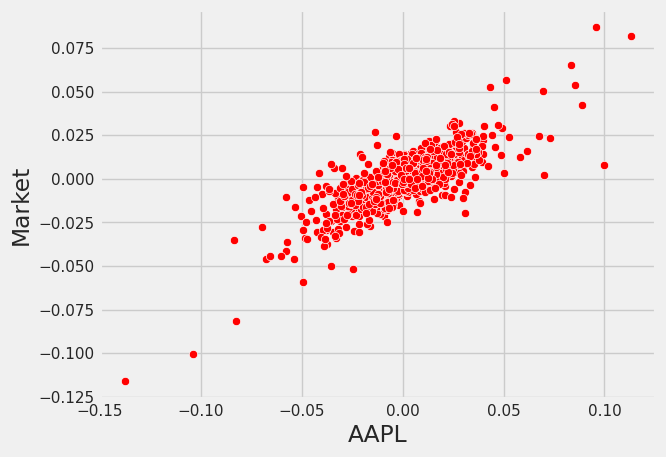

In [ ]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'AAPL', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='AAPL'>

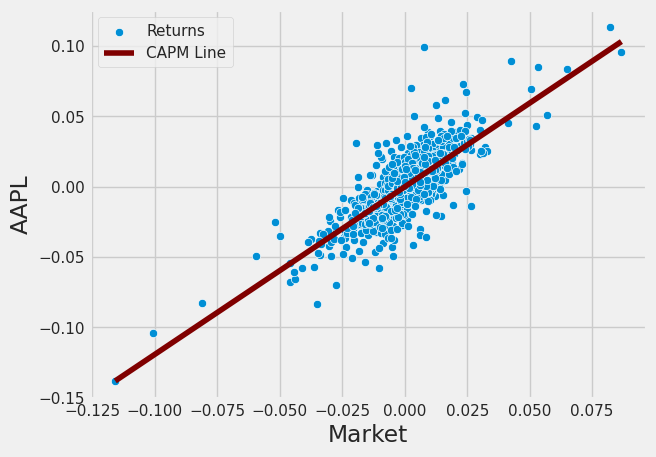

In [ ]:
sns.scatterplot(y = 'AAPL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_aapl, color = 'maroon', label = 'CAPM Line')

### Convert Daily Stock Market Returns to Annualized Returns (assuming 252 trading days in a year).

In [ ]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AAPL']].cov() *252
cov_aapl_market = cov.iloc[0,1]
cov_aapl_market
market_var = data['Market'].var()*252
market_var

AAPL_beta_annual = cov_aapl_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AAPL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AAPL_capm_return = rf + AAPL_beta_annual*riskpremium

print(f"The annualized CAPM return of AAPL is {AAPL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.1898321994872563
The annualized CAPM return of AAPL is 15.49%


In [ ]:
sharperatio = (rm-rf)/(data['AAPL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.345


In [ ]:
import yfinance as yf
import datetime

end_date = datetime.date.today().strftime('%Y-%m-%d')
microsoft = yf.Ticker("MSFT")
MSFT = microsoft.history(start = "2020-01-01", end= end_date)
MSFT.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-24 00:00:00-04:00,395.399994,395.399994,389.809998,393.079987,21004500,0.0,0.0
2025-03-25 00:00:00-04:00,393.920013,396.359985,392.640015,395.160004,15775000,0.0,0.0
2025-03-26 00:00:00-04:00,395.000000,395.309998,388.570007,389.970001,16108400,0.0,0.0
2025-03-27 00:00:00-04:00,390.130005,392.239990,387.399994,390.579987,13766800,0.0,0.0
2025-03-28 00:00:00-04:00,388.079987,389.130005,376.929993,378.799988,21613100,0.0,0.0


In [ ]:
balance_sheet = microsoft.balance_sheet # use the Ticker object (microsoft)
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = microsoft.financials # use the Ticker object (microsoft)
print("\nIncome Statement:")
print(income_statement.head())

info = microsoft.info # use the Ticker object (microsoft)
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = microsoft.dividends # use the Ticker object (microsoft)
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                            2024-06-30      2023-06-30     2022-06-30  \
Ordinary Shares Number    7434138859.0    7432000000.0   7464000000.0   
Share Issued              7434138859.0    7432000000.0   7464000000.0   
Net Debt                 33315000000.0   12533000000.0  35850000000.0   
Total Debt               67127000000.0   59965000000.0  61270000000.0   
Tangible Book Value     121660000000.0  128971000000.0  87720000000.0   

                           2021-06-30  
Ordinary Shares Number   7519000000.0  
Share Issued             7519000000.0  
Net Debt                43922000000.0  
Total Debt              67775000000.0  
Tangible Book Value     84477000000.0  

Income Statement:
                                            2024-06-30      2023-06-30  \
Tax Effect Of Unusual Items                -99918000.0      -2850000.0   
Tax Rate For Calcs                               0.182            0.19   
Normalized EBITDA                       133558000000.0  105155000

In [ ]:
microsoft = yf.Ticker("MSFT")

tickers = ["SPY", "AAL", "ZM", "MSFT", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
microsoft = yf.Ticker("MSFT")
MSFT = microsoft.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [ ]:
print(MSFT.Close.mean())
MSFT.describe()

288.42996022809376


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,288.352882,291.213538,285.387742,288.429960,2.864995e+07,0.010183,0.0
std,81.866032,82.075382,81.449908,81.803712,1.273432e+07,0.080950,0.0
min,131.143058,134.550627,126.845335,129.621155,7.164500e+06,0.000000,0.0
25%,228.880434,231.254830,225.511407,228.653854,2.052590e+07,0.000000,0.0
50%,276.798936,279.712803,273.085021,276.177521,2.548220e+07,0.000000,0.0
75%,333.309947,336.720739,330.869484,333.459564,3.293560e+07,0.000000,0.0
max,464.297590,465.639777,461.772294,464.854340,9.701270e+07,0.830000,0.0


In [ ]:
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,300.291565
2020-01-03 00:00:00-05:00,298.017731
2020-01-06 00:00:00-05:00,299.154694
2020-01-07 00:00:00-05:00,298.313507
2020-01-08 00:00:00-05:00,299.903351
...,...
2024-12-23 00:00:00-05:00,592.906433
2024-12-24 00:00:00-05:00,599.496582
2024-12-26 00:00:00-05:00,599.536499


In [ ]:
import pandas as pd
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'MSFT':MSFT, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,MSFT,META,ZM
Date,,,,,,
2024-12-23 00:00:00-05:00,592.906433,254.989655,17.250000,434.379028,599.316772,85.269997
2024-12-24 00:00:00-05:00,599.496582,257.916443,17.350000,438.450836,607.209778,85.669998
2024-12-26 00:00:00-05:00,599.536499,258.735504,17.350000,437.233276,602.813660,85.440002
2024-12-27 00:00:00-05:00,593.225464,255.309296,17.350000,429.668457,599.276855,83.820000
2024-12-30 00:00:00-05:00,586.455811,251.923019,17.620001,423.979858,590.714417,82.730003


In [ ]:
# print(MSFT)
# print(MSFT.shift(1))

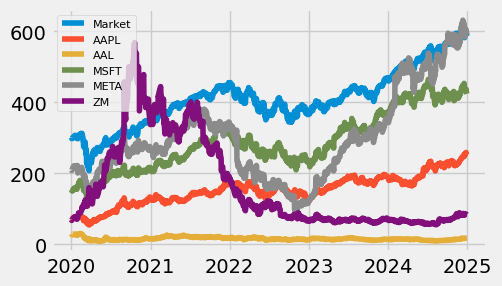

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and assign it to the alias 'plt'
import pandas as pd # import the pandas module to enable the use of the pd alias
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [ ]:
import numpy as np # Import the NumPy library and assign it to the alias 'np'
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,MSFT,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009770,-0.050769,-0.012530,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.002581,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002816,-0.004715,-0.003667,-0.009159,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015959,0.022522,0.015802,0.010087,0.009000


In [ ]:
beta_msft = (data[['Market','MSFT']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_msft

np.float64(1.1875522287835414)

In [ ]:
beta, alpha = np.polyfit(data['Market'], data['MSFT'], 1)
alpha
beta

np.float64(1.1875522287835398)

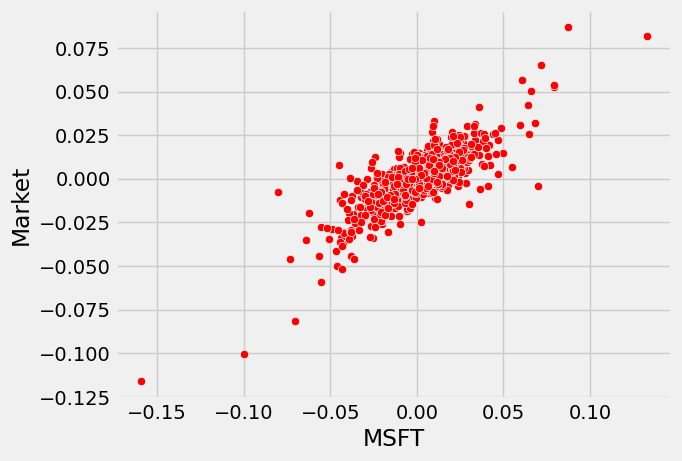

In [ ]:
import seaborn as sns # Import the seaborn library and assign it to the alias 'sns'
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'MSFT', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='MSFT'>

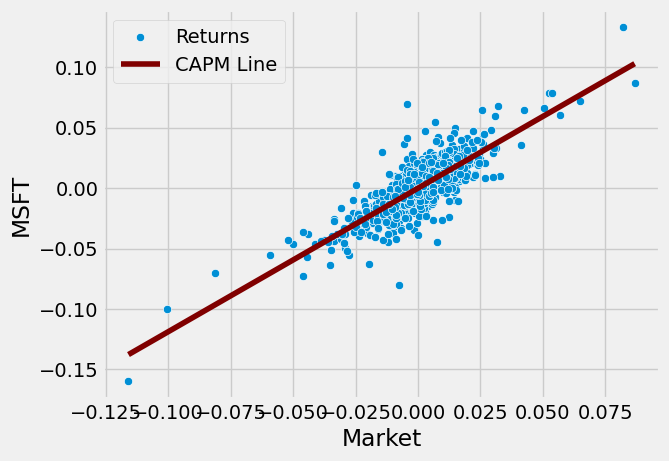

In [ ]:
sns.scatterplot(y = data['MSFT'], x = data['Market'], data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_msft, color = 'maroon', label = 'CAPM Line')

In [ ]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','MSFT']].cov() *252
cov_msft_market = cov.iloc[0,1]
cov_msft_market
market_var = data['Market'].var()*252
market_var

MSFT_beta_annual = cov_msft_market / market_var
print('The annualized beta will ewual the one calculated at daily returns:',MSFT_beta_annual) # Changed NFLX_beta_annual to MSFT_beta_annual

rm

The annualized beta will ewual the one calculated at daily returns: 1.1875522287835414


np.float64(0.1341881826925408)

In [ ]:
rf = 0.025
riskpremium = rm - rf

## CAPM
MSFT_capm_return = rf + MSFT_beta_annual*riskpremium

print(f"The annualized CAPM return of AAPL is {MSFT_capm_return*100:.2f}%")

The annualized CAPM return of AAPL is 15.47%


In [ ]:
sharperatio = (rm-rf)/(data['MSFT'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.3577


In [ ]:
import yfinance as yf
import datetime

end_date = datetime.date.today().strftime('%Y-%m-%d')
palantir = yf.Ticker("PLTR")
PLTR = palantir.history(start = "2020-01-01", end= end_date)
PLTR.tail()
palantir = yf.Ticker("PLTR")
PLTR = palantir.history(start = "2020-01-01", end= end_date)
PLTR.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-24 00:00:00-04:00,93.400002,97.389999,92.279999,96.750000,112164700,0.0,0.0
2025-03-25 00:00:00-04:00,97.220001,98.169998,95.080002,96.500000,78015300,0.0,0.0
2025-03-26 00:00:00-04:00,96.290001,97.300003,90.820000,92.279999,81428600,0.0,0.0
2025-03-27 00:00:00-04:00,91.014999,93.650002,89.669998,90.089996,82823000,0.0,0.0
2025-03-28 00:00:00-04:00,89.339996,89.379997,84.099998,85.849998,90849300,0.0,0.0


In [ ]:
balance_sheet = palantir.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = palantir.financials
print("\nIncome Statement:")
print(income_statement.head())

info = palantir.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")


dividends = palantir.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                          2024-12-31    2023-12-31    2022-12-31  \
Treasury Shares Number           NaN           0.0           NaN   
Ordinary Shares Number  2338795190.0  2200127714.0  2099075000.0   
Share Issued            2338795190.0  2200127714.0  2099075000.0   
Total Debt               239219000.0   229392000.0   249404000.0   
Tangible Book Value     5003275000.0  3475561000.0  2565326000.0   

                          2021-12-31 2020-12-31  
Treasury Shares Number           NaN        NaN  
Ordinary Shares Number  2027474000.0        NaN  
Share Issued            2027474000.0        NaN  
Total Debt               260073000.0        NaN  
Tangible Book Value     2291030000.0        NaN  

Income Statement:
                                         2024-12-31   2023-12-31   2022-12-31  \
Tax Effect Of Unusual Items                     0.0          0.0          0.0   
Tax Rate For Calcs                         0.043451     0.083158         0.21   
Normalized EBI

In [ ]:
palantir = yf.Ticker("PLTR")

tickers = ["SPY", "AAL", "ZM", "PLTR", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("PLTR")
PLTR = palantir.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [ ]:
print(PLTR.Close.mean())
PLTR.describe()

20.01441532523973


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1069.000000,1069.000000,1069.000000,1069.000000,1.069000e+03,1069.0,1069.0
mean,19.991609,20.546640,19.455469,20.014415,5.522291e+07,0.0,0.0
std,12.522416,12.888351,12.172431,12.577848,4.117599e+07,0.0,0.0
min,5.980000,6.170000,5.920000,6.000000,9.126400e+06,0.0,0.0
25%,10.040000,10.400000,9.760000,10.130000,3.209340e+07,0.0,0.0
50%,18.170000,18.858999,17.820000,18.200001,4.343060e+07,0.0,0.0
75%,24.610001,25.200001,24.020000,24.520000,6.271160e+07,0.0,0.0
max,83.160004,84.796997,81.300003,82.379997,4.502905e+08,0.0,0.0


In [ ]:
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,300.291565
2020-01-03 00:00:00-05:00,298.017731
2020-01-06 00:00:00-05:00,299.154694
2020-01-07 00:00:00-05:00,298.313507
2020-01-08 00:00:00-05:00,299.903351
...,...
2024-12-23 00:00:00-05:00,592.906433
2024-12-24 00:00:00-05:00,599.496582
2024-12-26 00:00:00-05:00,599.536499


In [ ]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'PLTR':PLTR, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,PLTR,META,ZM
Date,,,,,,
2024-12-23 00:00:00-05:00,592.906433,254.989655,17.250000,80.690002,599.316772,85.269997
2024-12-24 00:00:00-05:00,599.496582,257.916443,17.350000,82.379997,607.209778,85.669998
2024-12-26 00:00:00-05:00,599.536499,258.735504,17.350000,82.139999,602.813660,85.440002
2024-12-27 00:00:00-05:00,593.225464,255.309296,17.350000,79.080002,599.276855,83.820000
2024-12-30 00:00:00-05:00,586.455811,251.923019,17.620001,77.180000,590.714417,82.730003


In [ ]:
# print(PLTR)
# print(PLTR.shift(1))

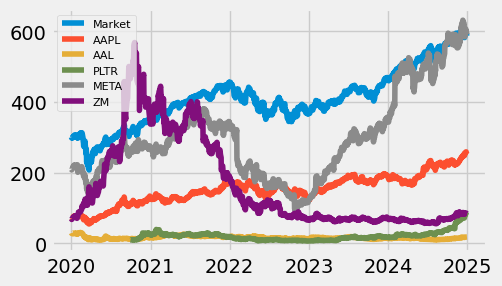

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [ ]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,PLTR,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009770,-0.050769,NaN,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,NaN,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002816,-0.004715,-0.003667,NaN,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015959,0.022522,NaN,0.010087,0.009000


In [ ]:
beta_pltr = (data[['Market','PLTR']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_pltr

np.float64(1.1826513309628626)

In [ ]:
beta, alpha = np.polyfit(data['Market'], data['PLTR'], 1)
alpha
beta

np.float64(nan)

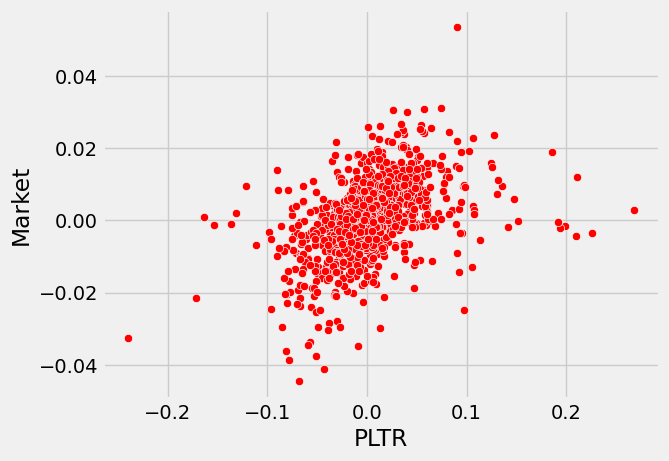

In [ ]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'PLTR', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='PLTR'>

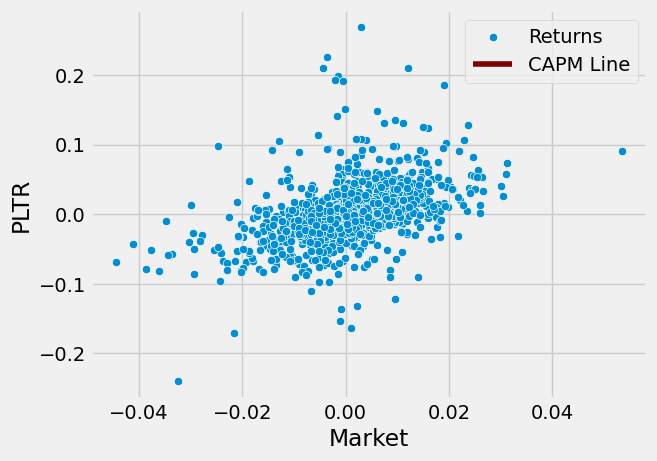

In [ ]:
sns.scatterplot(y = 'PLTR', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_pltr, color = 'maroon', label = 'CAPM Line')

In [ ]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','PLTR']].cov() *252
cov_pltr_market = cov.iloc[0,1]
cov_pltr_market
market_var = data['Market'].var()*252
market_var

PLTR_beta_annual = cov_pltr_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',PLTR_beta_annual)

rm

The annualized beta will equal the one calculated at daily returns: 1.1826513309628626


np.float64(0.1341881826925408)

In [ ]:
rf = 0.025
riskpremium = rm - rf

## CAPM
PLTR_capm_return = rf + PLTR_beta_annual*riskpremium

print(f"The annualized CAPM return of PLTR is {PLTR_capm_return*100:.2f}%")

The annualized CAPM return of PLTR is 15.41%


In [ ]:
sharperatio = (rm-rf)/(data['PLTR'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.1557


In [ ]:
import yfinance as yf
import datetime

end_date = datetime.date.today().strftime('%Y-%m-%d')
adobe = yf.Ticker("ADBE")
ADBE = adobe.history(start = "2020-01-01", end= end_date)
ADBE.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-24 00:00:00-04:00,392.470001,396.859985,391.380005,394.470001,5223000,0.0,0.0
2025-03-25 00:00:00-04:00,393.570007,404.320007,392.989990,403.640015,3648600,0.0,0.0
2025-03-26 00:00:00-04:00,403.000000,404.500000,397.010010,397.809998,3425000,0.0,0.0
2025-03-27 00:00:00-04:00,397.440002,401.480011,392.510010,396.149994,2729700,0.0,0.0
2025-03-28 00:00:00-04:00,393.890015,396.920013,384.760010,385.709991,3829200,0.0,0.0


In [ ]:
balance_sheet = adobe.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = adobe.financials
print("\nIncome Statement:")
print(income_statement.head())

info = adobe.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

dividends = adobe.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                          2024-11-30    2023-11-30    2022-11-30  \
Treasury Shares Number   160000000.0   146000000.0   139000000.0   
Ordinary Shares Number   441000000.0   455000000.0   462000000.0   
Share Issued             601000000.0   601000000.0   601000000.0   
Net Debt                         NaN           NaN           NaN   
Total Debt              6056000000.0  4080000000.0  4633000000.0   

                          2021-11-30 2020-11-30  
Treasury Shares Number   126000000.0        NaN  
Ordinary Shares Number   475000000.0        NaN  
Share Issued             601000000.0        NaN  
Net Debt                 279000000.0        NaN  
Total Debt              4673000000.0        NaN  

Income Statement:
                                          2024-11-30    2023-11-30  \
Tax Effect Of Unusual Items             -196400000.0    -1600000.0   
Tax Rate For Calcs                               0.2           0.2   
Normalized EBITDA                       8939000

In [ ]:
print(META.Close.mean())
META.describe()

299.97541438840926


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,299.811910,304.029698,295.797743,299.975414,2.315541e+07,0.001591,0.0
std,124.745252,125.702635,123.419958,124.602583,1.572882e+07,0.028172,0.0
min,89.657437,90.035652,87.676766,88.492928,4.726100e+06,0.000000,0.0
25%,207.860328,210.607429,205.541291,208.795929,1.453120e+07,0.000000,0.0
50%,277.850492,283.892056,274.983974,279.512665,1.938320e+07,0.000000,0.0
75%,345.003997,350.448357,341.570199,344.665619,2.711680e+07,0.000000,0.0
max,630.430194,637.318496,626.147483,631.608154,2.323166e+08,0.500000,0.0


In [ ]:
## keep only column close for all tickers
for ticker in tickers:
    # Check if globals()[ticker] is a DataFrame before accessing 'Close'
    if isinstance(globals()[ticker], pd.DataFrame):
        globals()[ticker] = globals()[ticker]['Close']
    else:
        # Handle the case where globals()[ticker] is already a Series
        print(f"Ticker {ticker} is already a Series.")

SPY

Ticker SPY is already a Series.
Ticker AAL is already a Series.
Ticker ZM is already a Series.
Ticker ADBE is already a Series.


,SPY
Date,
2020-01-02 00:00:00-05:00,300.291565
2020-01-03 00:00:00-05:00,298.017670
2020-01-06 00:00:00-05:00,299.154633
2020-01-07 00:00:00-05:00,298.313507
2020-01-08 00:00:00-05:00,299.903351
...,...
2024-12-23 00:00:00-05:00,592.906433
2024-12-24 00:00:00-05:00,599.496582
2024-12-26 00:00:00-05:00,599.536499


In [ ]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'ADBE':ADBE, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,ADBE,META,ZM
Date,,,,,,
2025-03-24 00:00:00-04:00,NaN,NaN,NaN,394.470001,NaN,NaN
2025-03-25 00:00:00-04:00,NaN,NaN,NaN,403.640015,NaN,NaN
2025-03-26 00:00:00-04:00,NaN,NaN,NaN,397.809998,NaN,NaN
2025-03-27 00:00:00-04:00,NaN,NaN,NaN,396.149994,NaN,NaN
2025-03-28 00:00:00-04:00,NaN,NaN,NaN,385.709991,NaN,NaN


In [ ]:
# print(ADBE)
# print(ADBE.shift(1))

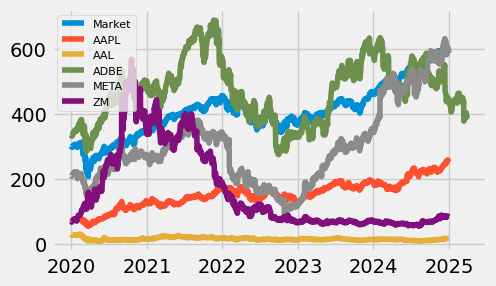

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and assign it to the alias 'plt'
import pandas as pd # import the pandas module to enable the use of the pd alias
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [ ]:
import numpy as np # Import the NumPy library and assign it to the alias 'np'
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,ADBE,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009770,-0.050769,-0.007865,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.005710,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.000959,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.013348,0.010087,0.009000


In [ ]:
beta_adbe = (data[['Market','ADBE']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_adbe

np.float64(1.2776239297466263)

In [ ]:
# Handle potential NaN or inf values in the data
data = data.replace([np.inf, -np.inf], np.nan).dropna()

beta, alpha = np.polyfit(data['Market'], data['ADBE'], 1)
alpha
beta

np.float64(1.277623929746627)

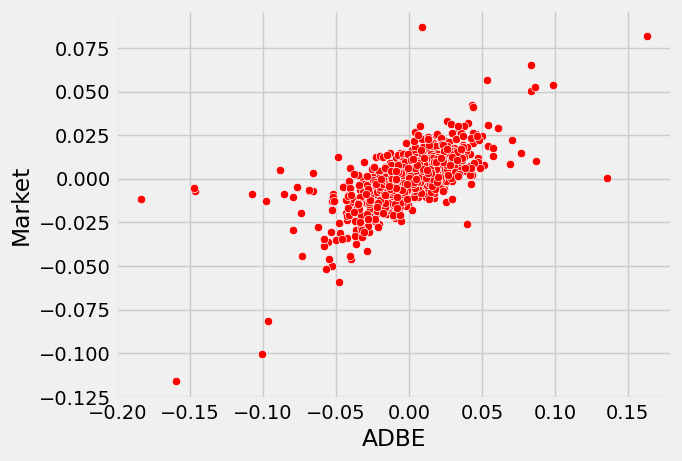

In [ ]:
import seaborn as sns
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'ADBE', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='ADBE'>

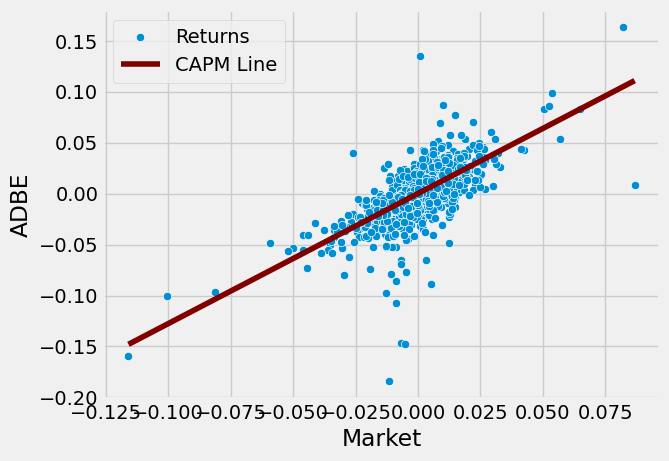

In [ ]:
sns.scatterplot(y = 'ADBE', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_adbe, color = 'maroon', label = 'CAPM Line')

In [ ]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','ADBE']].cov() *252
cov_nflx_market = cov.iloc[0,1]
cov_nflx_market
market_var = data['Market'].var()*252
market_var

NFLX_beta_annual = cov_nflx_market / market_var
print('The annualized beta will ewual the one calculated at daily returns:',NFLX_beta_annual)

rm



The annualized beta will ewual the one calculated at daily returns: 1.2776239297466265


np.float64(0.13418818269254085)

In [ ]:
rm = 0.025
rf = 0.0
riskpremium = rm - rf

## CAPM
ADBE_capm_return = rf + ADBE_beta_annual*riskpremium

print(f"The annualized CAPM return of ADBE is {ADBE_capm_return*100:.2f}%")

The annualized CAPM return of ADBE is 3.19%


In [ ]:
sharperatio = (rm-rf)/(data['ADBE'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.0638


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
import datetime

from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [ ]:
import yfinance as yf

end_date = datetime.date.today().strftime('%Y-%m-%d')
delta = yf.Ticker("DAL")
DAL = delta.history(start = "2020-01-01", end= end_date)
DAL.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-25 00:00:00-04:00,49.599998,49.990002,48.410000,48.669998,8227000,0.0,0.0
2025-03-26 00:00:00-04:00,48.900002,49.279999,47.509998,48.070000,6853200,0.0,0.0
2025-03-27 00:00:00-04:00,47.520000,48.000000,45.980000,46.150002,11157800,0.0,0.0
2025-03-28 00:00:00-04:00,46.000000,46.020000,43.599998,43.840000,15128100,0.0,0.0
2025-03-31 00:00:00-04:00,42.000000,44.009998,40.779999,43.599998,14347971,0.0,0.0


In [ ]:
balance_sheet = delta.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = delta.financials
print("\nIncome Statement:")
print(income_statement.head())

# Information about Delta:
info = delta.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = delta.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                           2024-12-31     2023-12-31     2022-12-31  \
Treasury Shares Number      8098971.0     11224246.0     10535033.0   
Ordinary Shares Number    646472635.0    643446948.0    641265753.0   
Share Issued              654571606.0    654671194.0    651800786.0   
Net Debt                13125000000.0  17313000000.0  19764000000.0   
Total Debt              22771000000.0  27281000000.0  30610000000.0   

                           2021-12-31 2020-12-31  
Treasury Shares Number      9752872.0        NaN  
Ordinary Shares Number    639967515.0        NaN  
Share Issued              649720387.0        NaN  
Net Debt                18987000000.0        NaN  
Total Debt              34679000000.0        NaN  

Income Statement:
                                          2024-12-31    2023-12-31  \
Tax Effect Of Unusual Items              -92364000.0   213600000.0   
Tax Rate For Calcs                             0.258         0.178   
Normalized EBITDA      

In [ ]:
delta = yf.Ticker("DAL")

tickers = ["SPY", "AAL", "ZM", "DAL", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
delta = yf.Ticker("DAL")
DAL = delta.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [ ]:
print(META.Close.mean())
META.describe()

299.9754143095054


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,299.811909,304.029698,295.797743,299.975414,2.315541e+07,0.001591,0.0
std,124.745252,125.702635,123.419958,124.602584,1.572882e+07,0.028172,0.0
min,89.657445,90.035660,87.676774,88.492935,4.726100e+06,0.000000,0.0
25%,207.860343,210.607414,205.541261,208.795944,1.453120e+07,0.000000,0.0
50%,277.850492,283.892024,274.984004,279.512634,1.938320e+07,0.000000,0.0
75%,345.003997,350.448326,341.570199,344.665619,2.711680e+07,0.000000,0.0
max,630.430194,637.318496,626.147483,631.608154,2.323166e+08,0.500000,0.0


In [ ]:
## keep only column close for all tickers
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,300.291595
2020-01-03 00:00:00-05:00,298.017700
2020-01-06 00:00:00-05:00,299.154572
2020-01-07 00:00:00-05:00,298.313446
2020-01-08 00:00:00-05:00,299.903351
...,...
2024-12-23 00:00:00-05:00,592.906433
2024-12-24 00:00:00-05:00,599.496582
2024-12-26 00:00:00-05:00,599.536499


In [ ]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'DAL':DAL, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,DAL,META,ZM
Date,,,,,,
2024-12-23 00:00:00-05:00,592.906433,254.989655,17.250000,61.370438,599.316772,85.269997
2024-12-24 00:00:00-05:00,599.496582,257.916443,17.350000,62.407913,607.209778,85.669998
2024-12-26 00:00:00-05:00,599.536499,258.735504,17.350000,62.248302,602.813660,85.440002
2024-12-27 00:00:00-05:00,593.225464,255.309296,17.350000,61.111069,599.276855,83.820000
2024-12-30 00:00:00-05:00,586.455811,251.923019,17.620001,60.572384,590.714417,82.730003


In [ ]:
# print(DAL)
# print(DAL.shift(1))

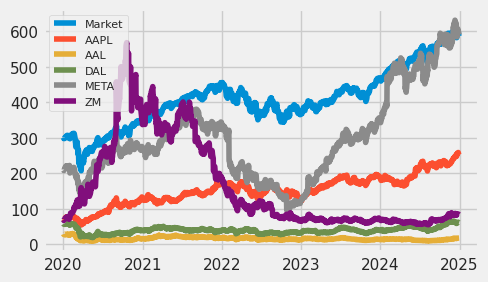

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [ ]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,DAL,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009769,-0.050769,-0.016738,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,-0.006913,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.000867,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015959,0.022522,0.021296,0.010087,0.009000


In [ ]:
beta_dal = (data[['Market','DAL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_dal

np.float64(1.3375975976018846)

In [ ]:
beta, alpha = np.polyfit(data['Market'], data['DAL'], 1)
alpha
beta

np.float64(1.3375975976018866)

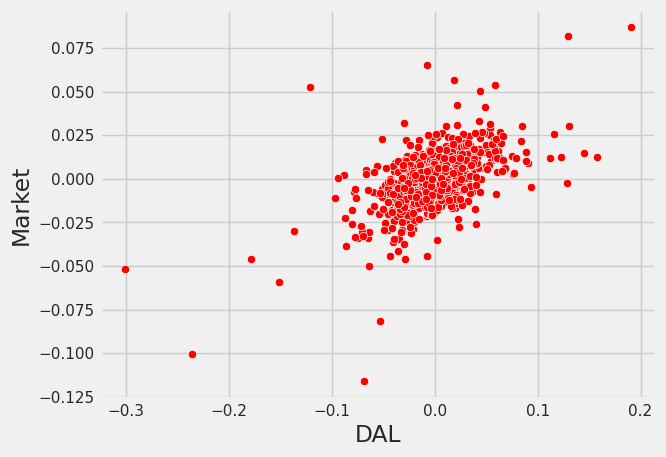

In [ ]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'DAL', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='DAL'>

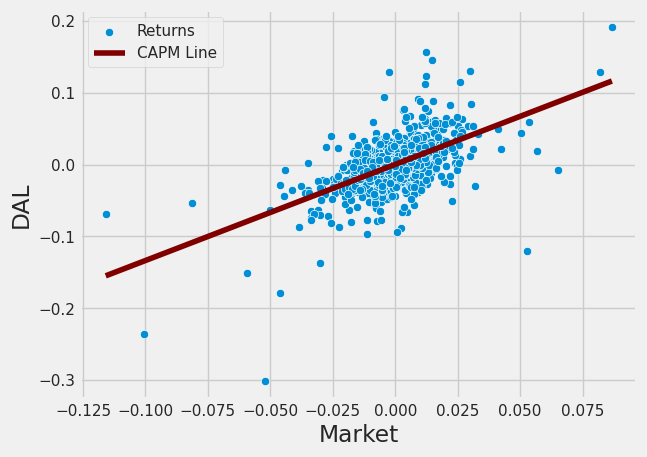

In [ ]:
sns.scatterplot(y = 'DAL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_dal, color = 'maroon', label = 'CAPM Line')

In [ ]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','DAL']].cov() *252
cov_dal_market = cov.iloc[0,1]
cov_dal_market
market_var = data['Market'].var()*252
market_var

DAL_beta_annual = cov_dal_market / market_var
print('The annualized beta will ewual the one calculated at daily returns:',DAL_beta_annual)

rm



The annualized beta will ewual the one calculated at daily returns: 1.3375975976018846


np.float64(0.13418816231873473)

In [ ]:
rf = 0.025
riskpremium = rm - rf

## CAPM
DAL_capm_return = rf + DAL_beta_annual*riskpremium

print(f"The annualized CAPM return of DAL is {DAL_capm_return*100:.2f}%")

The annualized CAPM return of DAL is 17.10%


In [ ]:
sharperatio = (rm-rf)/(data['DAL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.2215
